In [2]:
import pandas as pd 
!pip install openpyxl

import pandas as pd

from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt 
import math
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import seaborn as sns 

In [3]:
df = pd.read_excel('result_screening.xlsx')

In [4]:
# change response to viscosity
df = df.rename(columns={'Response':'Viscosity'})
df

,Screen,pH,Speed,Viscosity
0,1,3,20,1.15
1,1,3,60,2.93
2,1,3,100,2.11
3,1,6,20,1.79
4,1,6,60,6.09
5,1,6,100,6.23
6,1,9,20,3.36
7,1,9,60,8.81
8,1,9,100,8.52
9,2,3,100,2.90


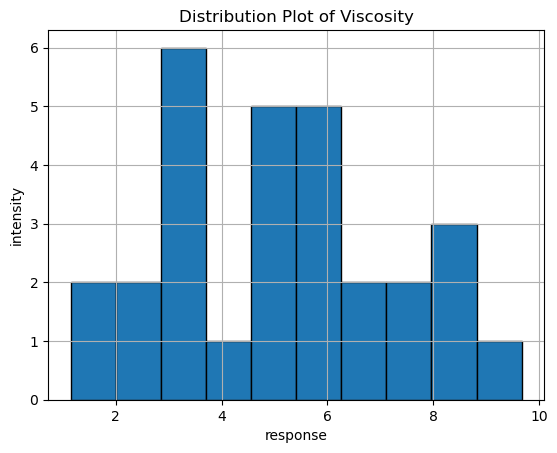

In [5]:
## test if normal distributed

#histgram
df['Viscosity'].hist(bins=10, edgecolor='black')
plt.title('Distribution Plot of Viscosity')
plt.xlabel('response')
plt.ylabel('intensity')
plt.show()


In [6]:
# Shapiro-wilks
nor_result = stats.shapiro(df['Viscosity'])
print(nor_result)

ShapiroResult(statistic=0.970054383195265, pvalue=0.5611692536176263)


P_value = 0.5611 greater than 0.05, the data is normally distributed. 
Use ANOVA test.

In [7]:
# Extract each column from df
pH = df['pH']
Speed = df['Speed']

In [8]:
# create the model
# syntax ols('dependent_variable ~ independent_variable', data=dataset).fit()
model = ols('Viscosity ~ pH * Speed', data = df).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
# anova_result_decimal = "{:.10f}".format(anova_result['PR(>F)'])
# # p_value = "{:.12f}".format(p_value)

# print(anova_result['PR(>F)'])
print(anova_result)

              sum_sq    df           F        PR(>F)
pH        100.608754   1.0  123.481942  3.662610e-11
Speed      22.690242   1.0   27.848820  1.822142e-05
pH:Speed    4.221736   1.0    5.181539  3.165427e-02
Residual   20.369123  25.0         NaN           NaN


In [23]:
# plt.figure(figsize=(10, 12))
    
    
# ax = plt.axes(111, projection='3d')
# fg = ax.scatter3D(df['pH'], df['Speed'], df['Viscosity'], 
#                   cmap='coolwarm')

# # Set axis labels and title
# ax.set_xlabel('pH', fontweight='bold', fontsize=12)
# ax.set_ylabel('Speed', fontweight='bold',fontsize=12)
# ax.set_zlabel('Viscosity', fontweight='bold',fontsize=12)
# plt.title('3D plot')
# # Set angle in case zlabel can't show
# ax.view_init(elev=20, azim=30)
# plt.tight_layout()
# # Display the plot
# plt.show()

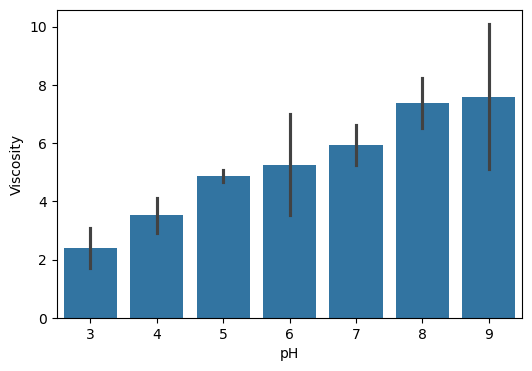

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='pH', y='Viscosity', errorbar='sd')
plt.show()

In [10]:
from scipy.stats import ttest_ind
from itertools import combinations

In [17]:
# post-hoc with T-test

levels = df['pH'].unique()
print(f'T-test of variable: pH')
for level1, level2 in combinations(levels, 2):
  group1 = df[df['pH'] == level1]['Viscosity'] 
  group2 = df[df['pH'] == level2]['Viscosity']
  t_stat, p_value = ttest_ind(group1, group2)
  print(f"{level1} vs {level2}: t_statistic: {t_stat}")
  if p_value < 0.05:
    print(f"{level1} vs {level2}: p_value: {p_value:.5f}")
  else:
    print('No significant difference')

T-test of variable: pH
3 vs 6: t_statistic: -3.7445675828506406
3 vs 6: p_value: 0.00382
3 vs 9: t_statistic: -4.955045244932901
3 vs 9: p_value: 0.00079
3 vs 4: t_statistic: -2.350833780017106
No significant difference
3 vs 5: t_statistic: -5.822539032442267
3 vs 5: p_value: 0.00065
3 vs 7: t_statistic: -7.154103595784678
3 vs 7: p_value: 0.00018
3 vs 8: t_statistic: -9.456696372970235
3 vs 8: p_value: 0.00003
6 vs 9: t_statistic: -1.8380593133323646
No significant difference
6 vs 4: t_statistic: 1.6423600854177884
No significant difference
6 vs 5: t_statistic: 0.3763208050735915
No significant difference
6 vs 7: t_statistic: -0.618134262759809
No significant difference
6 vs 8: t_statistic: -1.952363776589322
No significant difference
9 vs 4: t_statistic: 2.7218220401613347
9 vs 4: p_value: 0.03456
9 vs 5: t_statistic: 1.8427318181638999
No significant difference
9 vs 7: t_statistic: 1.1116361794804008
No significant difference
9 vs 8: t_statistic: 0.14114135866244376
No significant d

In [27]:
# post-hoc with Tukry HSD Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [28]:
pH_tukey = pairwise_tukeyhsd(df['Viscosity'], df['pH'])
print(pH_tukey)



Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4   1.1167 0.9213 -2.1673 4.4007  False
     3      5     2.47 0.2315  -0.814  5.754  False
     3      6   2.8617 0.0314  0.1803  5.543   True
     3      7   3.5233 0.0302  0.2393 6.8073   True
     3      8   4.9833 0.0011  1.6993 8.2673   True
     3      9    5.198 0.0001  2.3857 8.0103   True
     4      5   1.3533 0.9033 -2.4387 5.1454  False
     4      6    1.745  0.611  -1.539  5.029  False
     4      7   2.4067 0.4117 -1.3854 6.1987  False
     4      8   3.8667 0.0437  0.0746 7.6587   True
     4      9   4.0813 0.0118  0.6896  7.473   True
     5      6   0.3917 0.9997 -2.8923 3.6757  False
     5      7   1.0533 0.9689 -2.7387 4.8454  False
     5      8   2.5133 0.3627 -1.2787 6.3054  False
     5      9    2.728 0.1729 -0.6637 6.1197  False
     6      7   0.6617  0.994 -2.6223 3.9457  False
     6      

In [29]:
Speed_tukey = pairwise_tukeyhsd(df['Viscosity'], df['Speed'])
print(Speed_tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    20     60   3.8433 0.0819 -0.4071 8.0937  False
    20    100   3.3309 0.0398  0.1354 6.5263   True
    60    100  -0.5125 0.9165 -3.7079  2.683  False
---------------------------------------------------


In [25]:
# linear regression

x = df[['pH', 'Speed']]
x = sm.add_constant(x)
y = df['Viscosity']

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Viscosity   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     64.03
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           9.01e-11
Time:                        10:19:51   Log-Likelihood:                -38.758
No. Observations:                  29   AIC:                             83.52
Df Residuals:                      26   BIC:                             87.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0620      0.821     -3.728      0.0